In [1]:

# -*- coding: utf-8 -*-
"""
Created on Mon Aug 17 13:22:30 2020

@author: rudym
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dfply import *
import seaborn as sns #visualisation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)



# Speed Dating

# Loading Data

In [2]:


df = pd.read_csv("speed.csv", sep = ",")
df.head(10)



,respondant,iid,id,gender,idg,condtn,wave,round,position,positin1,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1,1.0,0,1,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,2,1,1.0,0,1,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,3,1,1.0,0,1,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,4,1,1.0,0,1,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,5,1,1.0,0,1,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,6,1,1.0,0,1,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,7,1,1.0,0,1,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,8,1,1.0,0,1,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,9,1,1.0,0,1,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,10,1,1.0,0,1,1,1,10,7,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
new_df=(df>>select(X.field_cd,X.sinc,X.shar,X.intel,X.fun,X.amb,X.sinc5_3,X.income,X.samerace,X.int_corr,X.attr,X.imprelig, X.career, X.tuition, X.match, X.gender,X.age_o,X.goal,X.date,X.go_out))
new_df.describe()
np.sum(new_df.isnull()) # Here we can see the variables with missing values


field_cd      82
sinc         277
shar        1067
intel        296
fun          350
amb          712
sinc5_3     6362
income      4099
samerace       0
int_corr     158
attr         202
imprelig      79
career        89
tuition     4795
match          0
gender         0
age_o        104
goal          79
date          97
go_out        79
dtype: int64

In [4]:
female=df['gender']==0
new_df['female']=female

In [5]:
np.sum(new_df.isnull())

field_cd      82
sinc         277
shar        1067
intel        296
fun          350
amb          712
sinc5_3     6362
income      4099
samerace       0
int_corr     158
attr         202
imprelig      79
career        89
tuition     4795
match          0
gender         0
age_o        104
goal          79
date          97
go_out        79
female         0
dtype: int64

# Data Cleaning
# Filling missing values with median

In [6]:

new_df.income=new_df.income.replace({pd.np.nan: "55,080.00"})
new_df.tuition=new_df.tuition.replace({pd.np.nan: "26,908.00"})
value_2=new_df['age_o'].median()

new_df['age_o'] = new_df['age_o'].fillna(value_2)

value_3=new_df['goal'].median()

new_df['goal'] = new_df['goal'].fillna(value_3)

value_4=new_df['date'].median()

new_df['date'] = new_df['date'].fillna(value_4)

value_5=new_df['go_out'].median()

new_df['go_out'] = new_df['go_out'].fillna(value_5)

value_6=new_df['field_cd'].median()
new_df['field_cd']=new_df['field_cd'].fillna(value_6)

new_df

new_df['salary']=new_df['income'].apply(lambda x: x.replace(',',""))
new_df['Income']=new_df['salary'].apply(lambda x: int(x.split('.00')[0]))

new_df['amount_t']=new_df['tuition'].apply(lambda x: x.replace(',',""))
new_df['Tuition']=new_df['amount_t'].apply(lambda x: int(x.split('.00')[0]))
np.sum(new_df.isna())


value_7=new_df['int_corr'].median()

new_df['int_corr'] = new_df['int_corr'].fillna(value_7)

value_8=new_df['samerace'].median()

new_df['samerace'] = new_df['samerace'].fillna(value_8)

value_9=new_df['attr'].median()

new_df['attr'] = new_df['attr'].fillna(value_9)

value_10=new_df['imprelig'].median()

new_df['imprelig'] = new_df['imprelig'].fillna(value_10)


value_11=new_df['sinc5_3'].median()

new_df['sinc5_3'] = new_df['sinc5_3'].fillna(value_11)
np.sum(new_df.isna())



value_13=new_df['intel'].median()

new_df['intel'] = new_df['intel'].fillna(value_13)

value_14=new_df['fun'].median()

new_df['fun'] = new_df['fun'].fillna(value_14)


value_15=new_df['amb'].median()

new_df['amb'] = new_df['amb'].fillna(value_15)

value_16=new_df['sinc'].median()

new_df['sinc'] = new_df['sinc'].fillna(value_16)

value_17=new_df['shar'].median()

new_df['shar'] = new_df['shar'].fillna(value_17)

np.sum(new_df.isnull())
dataset=(new_df>>drop(X.tuition,X.career,X.income,X.goal))

# Data Exploration

In [7]:

new_df.describe()


bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
bins

field_names=['Law','Math', 'Social Science','Medical','Engineering','English/Creative Writing/ Journalism','History/Religion/Philosophy ',
            'Business/Econ/Finance ','Education/Academia ','Biological Sciences/Chemistry/Physics','Social Work ','Undergrad/undecided',
             'Political Science/International Affairs ','Film','Fine Arts/Arts Administration','Languages','Architecture','Other']


d=dict(enumerate(field_names,1))

new_df['field_cat']=np.vectorize(d.get)(np.digitize(new_df['field_cd'], bins))

new_df

plot1=(new_df>>mask(X.match==1)>>select(X.field_cd,X.field_cat)>>group_by(X.field_cat)>>summarize(count=n(X.field_cat)))
# Here I'm using a similar package to R's 'Dplyr'. This allows me to retain some familiarity with R.



# Question 1: What are the specific career fields for our dating participants?

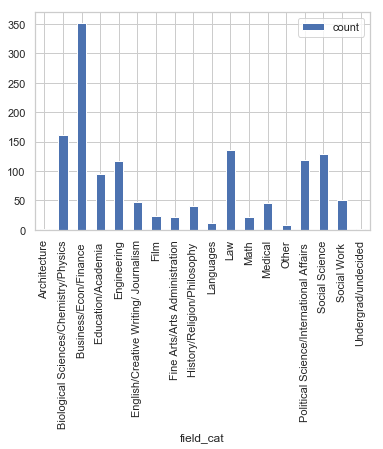

In [8]:
plot1.plot(kind="bar", x='field_cat')

In [9]:


goal_cat=['Seemed like a fun night out','To meet new people','To get a date','Looking for a serious relationship',
'To say I did it','Other']
bin2=[1,2,3,4,5,6]


a=dict(enumerate(goal_cat,1))
new_df['goal_p']=np.vectorize(a.get)(np.digitize(new_df['goal'], bins))

new_df.head(15)

plot2=(new_df>>mask(X.match==1) >>select(X.goal,X.goal_p)>>group_by(X.goal_p)>>summarize(count=n(X.goal_p)))

plot2



,goal_p,count
0,Looking for a serious relationship,51
1,Other,62
2,Seemed like a fun night out,583
3,To get a date,100
4,To meet new people,499
5,To say I did it,85


# Question 2: Which Goal had the highest percentage for matches?

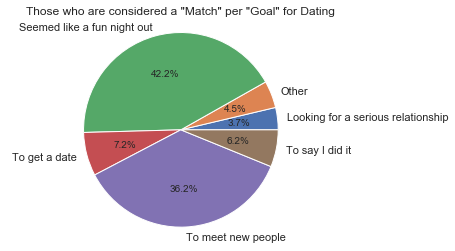

In [10]:
plt.pie(plot2['count'],labels=plot2['goal_p'],autopct='%1.1f%%')
plt.title('Those who are considered a "Match" per "Goal" for Dating')
plt.axis('equal')
plt.show()


In [11]:
np.sum(new_df.isnull())


field_cd      0
sinc          0
shar          0
intel         0
fun           0
amb           0
sinc5_3       0
income        0
samerace      0
int_corr      0
attr          0
imprelig      0
career       89
tuition       0
match         0
gender        0
age_o         0
goal          0
date          0
go_out        0
female        0
salary        0
Income        0
amount_t      0
Tuition       0
field_cat     0
goal_p        0
dtype: int64

In [12]:
dataset=(new_df>>drop(X.tuition,X.career,X.income,X.goal))

# Question 3: How do Men and Women differ in area of prefferences of the oppisite sex?

# Male=1

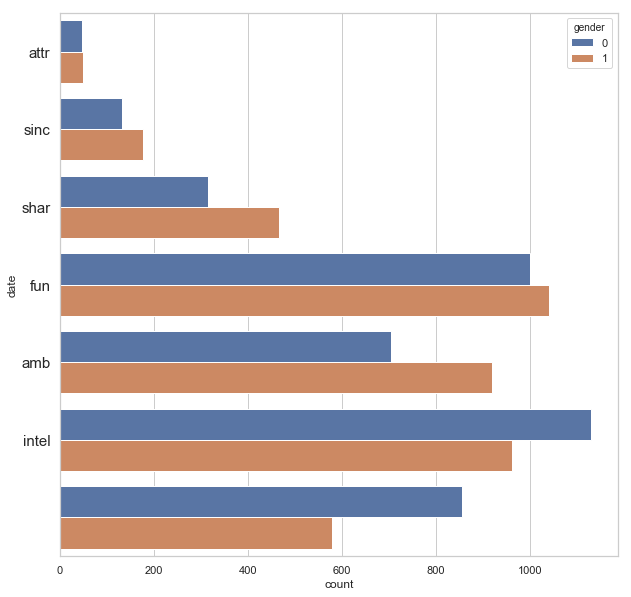

In [13]:

pf =['attr','sinc','shar','fun',
              'amb','intel']
g = plt.figure(figsize=(10,10))
g = sns.countplot(y="date",data=dataset, hue='gender')
g.set(yticklabels=pf)
g = plt.yticks(rotation=0,fontsize=15)

In [14]:

np.sum(dataset.isnull())

field_cd     0
sinc         0
shar         0
intel        0
fun          0
amb          0
sinc5_3      0
samerace     0
int_corr     0
attr         0
imprelig     0
match        0
gender       0
age_o        0
date         0
go_out       0
female       0
salary       0
Income       0
amount_t     0
Tuition      0
field_cat    0
goal_p       0
dtype: int64

# Heatmap to show correlations among variables

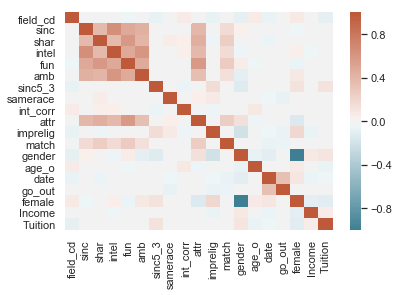

In [15]:
hm=dataset.corr()
cmap=sns.diverging_palette(220, 22, as_cmap=True)
sns.heatmap(hm, cmap=cmap)

In [16]:
dataset.describe()

,field_cd,sinc,shar,intel,fun,amb,sinc5_3,samerace,int_corr,attr,imprelig,match,gender,age_o,date,go_out,Income,Tuition
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,7.665791,7.169372,5.541478,7.355574,6.425639,6.796431,7.907376,0.395799,0.196274,6.185414,3.645500,0.164717,0.500597,26.360468,5.006684,2.156601,49874.312246,24456.149439
std,3.740640,1.711587,2.021959,1.524334,1.916210,1.717241,0.756029,0.489051,0.300669,1.926733,2.792688,0.370947,0.500029,3.541689,1.436143,1.100129,13310.323063,5246.026947
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-0.830000,0.000000,1.000000,0.000000,0.000000,18.000000,1.000000,1.000000,8607.000000,2406.000000
25%,5.000000,6.000000,4.000000,7.000000,5.000000,6.000000,8.000000,0.000000,-0.010000,5.000000,1.000000,0.000000,0.000000,24.000000,4.000000,1.000000,42651.000000,25555.000000
50%,8.000000,7.000000,6.000000,7.000000,7.000000,7.000000,8.000000,0.000000,0.210000,6.000000,3.000000,0.000000,1.000000,26.000000,5.000000,2.000000,55080.000000,26908.000000
75%,10.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,1.000000,0.430000,8.000000,6.000000,0.000000,1.000000,28.000000,6.000000,3.000000,55080.000000,26908.000000
max,18.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.910000,10.000000,10.000000,1.000000,1.000000,55.000000,7.000000,7.000000,109031.000000,34300.000000


# Modeling

In [17]:
y=dataset['match']
X=(dataset>>drop(X.match,X.goal_p,X.field_cat,X.salary,X.amount_t))
dataset.head()

from math import pow
X['log_income']=np.log(dataset['Income'])
X['log_tuition']=np.log(dataset['Tuition'])
X.head()
import statsmodels.api as sm
X = X.assign(const=1)


In [18]:
age2=X['age_o']**2

In [19]:
X['age2']=age2

In [20]:
X=(X>>drop(X.female))

In [21]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())
# remove insignificant values

Optimization terminated successfully.
         Current function value: 0.384427
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  match   No. Observations:                 8378
Model:                          Logit   Df Residuals:                     8357
Method:                           MLE   Df Model:                           20
Date:                Wed, 26 Aug 2020   Pseudo R-squ.:                  0.1408
Time:                        18:59:51   Log-Likelihood:                -3220.7
converged:                       True   LL-Null:                       -3748.4
                                        LLR p-value:                6.118e-211
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
field_cd       -0.0124      0.009     -1.450      0.147      -0.029       0.004
sinc            0.0067    

In [22]:
X=(X>>drop(X.Income,X.Tuition,X.date))
X.head()


import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.385273
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  match   No. Observations:                 8378
Model:                          Logit   Df Residuals:                     8360
Method:                           MLE   Df Model:                           17
Date:                Wed, 26 Aug 2020   Pseudo R-squ.:                  0.1389
Time:                        18:59:52   Log-Likelihood:                -3227.8
converged:                       True   LL-Null:                       -3748.4
                                        LLR p-value:                1.399e-210
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
field_cd       -0.0105      0.008     -1.238      0.216      -0.027       0.006
sinc            0.0060    

In [23]:
X=(X>>drop(X.go_out, X.int_corr,X.sinc,X.log_income,X.field_cd))
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.387920
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  match   No. Observations:                 8378
Model:                          Logit   Df Residuals:                     8365
Method:                           MLE   Df Model:                           12
Date:                Wed, 26 Aug 2020   Pseudo R-squ.:                  0.1330
Time:                        18:59:52   Log-Likelihood:                -3250.0
converged:                       True   LL-Null:                       -3748.4
                                        LLR p-value:                9.104e-206
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
shar            0.2049      0.021      9.535      0.000       0.163       0.247
intel           0.0687    

In [24]:
X=(X>>drop(X.samerace))
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.387928
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  match   No. Observations:                 8378
Model:                          Logit   Df Residuals:                     8366
Method:                           MLE   Df Model:                           11
Date:                Wed, 26 Aug 2020   Pseudo R-squ.:                  0.1329
Time:                        18:59:53   Log-Likelihood:                -3250.1
converged:                       True   LL-Null:                       -3748.4
                                        LLR p-value:                9.919e-207
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
shar            0.2045      0.021      9.530      0.000       0.162       0.247
intel           0.0688    

In [25]:
X=(X>>drop(X.imprelig,X.age2))
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.388030
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  match   No. Observations:                 8378
Model:                          Logit   Df Residuals:                     8368
Method:                           MLE   Df Model:                            9
Date:                Wed, 26 Aug 2020   Pseudo R-squ.:                  0.1327
Time:                        18:59:53   Log-Likelihood:                -3250.9
converged:                       True   LL-Null:                       -3748.4
                                        LLR p-value:                2.100e-208
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
shar            0.2064      0.021      9.642      0.000       0.164       0.248
intel           0.0677    

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression( max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.83


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2047   41]
 [ 396   30]]


In [28]:
# Here we can see that 

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2088
           1       0.42      0.07      0.12       426

    accuracy                           0.83      2514
   macro avg       0.63      0.53      0.51      2514
weighted avg       0.77      0.83      0.77      2514



In [30]:
rsquared_score = r2_score(y_test, y_pred)
length_y_test = len(y_test)
"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)


'The r-squared score for your model was -0.23511278398359492 on 2514 values.'

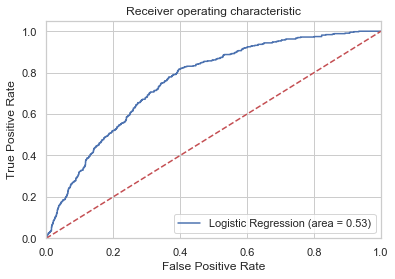

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [32]:
# We can improve the model by using a sampling technique to deal with our variable "Match".
# Match is imbalacned.

# Improve AUC by implementing SMOTE for imbalanced minority class

In [33]:

df.match.value_counts()

0    6998
1    1380
Name: match, dtype: int64

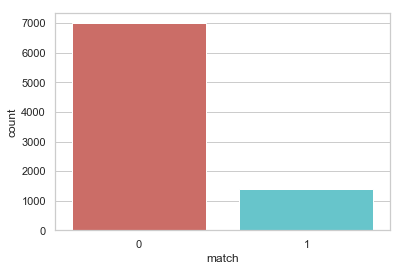

In [34]:
sns.countplot(x=df.match, data=df, palette ='hls')
plt.show()

# Here we can see that there is imbalance to our Matches variable.

In [35]:


from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['match'])


In [36]:
print("length of oversampled data is ",len(os_data_X))
print("Number of no match in oversampled data",len(os_data_y[os_data_y['match']==0]))
print("Number of match",len(os_data_y[os_data_y['match']==1]))
print("Proportion of no match data in oversampled data is ",len(os_data_y[os_data_y['match']==0])/len(os_data_X))
print("Proportion of match data in oversampled data is ",len(os_data_y[os_data_y['match']==1])/len(os_data_X))



length of oversampled data is  9820
Number of no match in oversampled data 4910
Number of match 4910
Proportion of no match data in oversampled data is  0.5
Proportion of match data in oversampled data is  0.5


In [37]:


X=os_data_X
y=os_data_y

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(maxiter=1000)
print(result.summary())
X.head()
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(maxiter=1000)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.561664
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  match   No. Observations:                 9820
Model:                          Logit   Df Residuals:                     9810
Method:                           MLE   Df Model:                            9
Date:                Wed, 26 Aug 2020   Pseudo R-squ.:                  0.1897
Time:                        18:59:57   Log-Likelihood:                -5515.5
converged:                       True   LL-Null:                       -6806.7
                                        LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
shar            0.1843      0.016     11.667      0.000       0.153       0.215
intel           0.1246    

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression( max_iter=1000)
logreg.fit(X_train, y_train.values.ravel())
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.71


In [39]:
data_final_vars=X.columns.values.tolist()
y=['match']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg_2 = LogisticRegression( max_iter=1000)
rfe = RFE(logreg_2, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\rudym\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


In [40]:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1007  456]
 [ 407 1076]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1463
           1       0.70      0.73      0.71      1483

    accuracy                           0.71      2946
   macro avg       0.71      0.71      0.71      2946
weighted avg       0.71      0.71      0.71      2946



In [42]:

rsquared_score = r2_score(y_test, y_pred)
length_y_test = len(y_test)
"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)


'The r-squared score for your model was -0.1718123236737712 on 2946 values.'

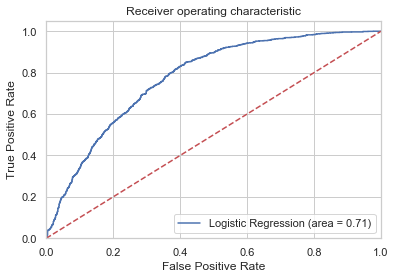

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Here we improved to 71%